In [1]:
# import packages
import pandas as pd
import numpy as np
import math as math
import matplotlib as plt
import seaborn as sn
from matplotlib import pyplot as plt
from scipy.stats import levene
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from sklearn import metrics

In [2]:
# read data
df = pd.read_excel("../Data/Data.xlsx")

In [3]:
# show data
df

,Guesses,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P15,P16,P17,Gender,Yearofbirth,highest_degree,Berlin,Hamburg,Jerusalem,TelAviv
0,solution,H,B,J,T,B,H,T,J,B,...,H,H,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AI_Guess,H,B,J,T,B,H,T,J,H,...,B,H,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Controlgroup,B,B,T,J,B,H,J,T,B,...,H,B,J,M,1999.0,State_exam,1.0,0.0,0.0,0.0
3,Controlgroup,B,B,T,T,B,H,J,J,B,...,H,H,T,M,1995.0,A_level,1.0,1.0,0.0,0.0
4,Controlgroup,B,B,T,J,B,H,T,T,B,...,B,H,T,W,1996.0,Bachelor,1.0,0.0,0.0,0.0
5,Controlgroup,B,B,J,J,H,H,T,T,B,...,H,B,T,M,1992.0,Bachelor,1.0,0.0,1.0,1.0
6,Controlgroup,H,B,T,T,J,H,J,J,B,...,H,H,T,W,1996.0,Master,1.0,1.0,0.0,0.0
7,Controlgroup,H,B,J,T,B,H,T,J,H,...,H,B,T,W,1999.0,A_level,1.0,0.0,0.0,0.0
8,Controlgroup,B,B,T,J,B,H,T,J,B,...,H,H,J,M,1998.0,Bachelor,1.0,1.0,0.0,0.0
9,Controlgroup,B,H,T,J,B,H,T,J,H,...,H,H,J,M,1998.0,Bachelor,1.0,1.0,0.0,0.0


In [4]:
# separate data frame
solutions=df.head(2)
guesses=df.tail(30)
controlgroup=df.loc[2:11]
treatment1=df.loc[12:21]
treatment2=df.loc[22:31]

In [5]:
# define groups
pre=["P1","P2","P3","P4"]
post=["P13","P15","P16","P17"]
up=["P5","P6","P7","P8","P9","P10","P11","P12"]
userdata=["Gender","Yearofbirth","highest_degree","Berlin","Hamburg","Jerusalem","TelAviv"]

In [6]:
#measure user performance
def measure_performance(data, solutions, testtype):
    performance=[]
    for user in range(len(data)):
        i=0
        for picture in testtype:
            if data[testtype].iloc[user][picture] == solutions[testtype].iloc[0][picture]:
                i = i+1
        performance.append(i)
    return performance

In [7]:
#user performance controlgroup
measure_performance(controlgroup, solutions, up)

[5, 4, 5, 5, 5, 6, 7, 6, 4, 7]

In [8]:
np.mean(measure_performance(controlgroup, solutions, up))

5.4

In [9]:
np.median(measure_performance(controlgroup, solutions, up))

5.0

In [10]:
stdcontrol = np.std(measure_performance(controlgroup, solutions, up))*np.sqrt(10/(10-1))
stdcontrol

1.07496769977314

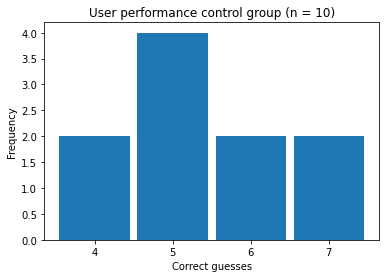

In [11]:
frequency = [2, 4, 2, 2]
rightguesses = ("4","5","6","7")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Correct guesses")
plt.ylabel("Frequency")
plt.title("User performance control group (n = 10)")
plt.savefig('up_control.png', facecolor='w')
plt.show()

In [12]:
# user performance treatment1
measure_performance(treatment1, solutions, up)

[7, 5, 7, 6, 6, 6, 5, 6, 6, 8]

In [13]:
np.mean(measure_performance(treatment1, solutions, up))

6.2

In [14]:
np.median(measure_performance(treatment1, solutions, up))

6.0

In [15]:
stdtreat1 = np.std(measure_performance(treatment1, solutions, up))*np.sqrt(10/(10-1))
stdtreat1

0.9189365834726815

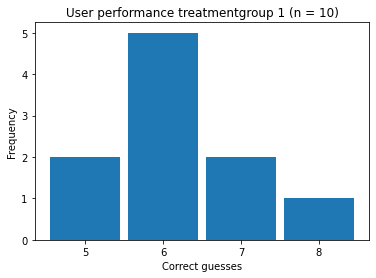

In [16]:
frequency = [2, 5, 2, 1]
rightguesses = ("5","6","7","8")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Correct guesses")
plt.ylabel("Frequency")
plt.title("User performance treatmentgroup 1 (n = 10)")
plt.savefig('up_treat1.png', facecolor='w')
plt.show()

In [17]:
# user performance treatment2
measure_performance(treatment2, solutions, up)

[7, 7, 7, 7, 8, 7, 7, 8, 6, 7]

In [18]:
np.mean(measure_performance(treatment2, solutions, up))

7.1

In [19]:
np.median(measure_performance(treatment2, solutions, up))

7.0

In [20]:
stdtreat2 = np.std(measure_performance(treatment2, solutions, up))*np.sqrt(10/(10-1))
stdtreat2

0.5676462121975467

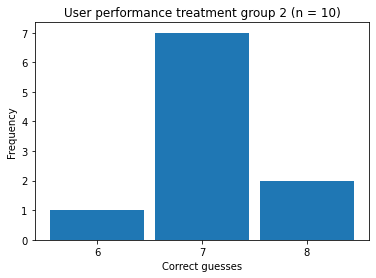

In [21]:
frequency = [1, 7, 2]
rightguesses = ("6","7","8")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Correct guesses")
plt.ylabel("Frequency")
plt.title("User performance treatment group 2 (n = 10)")
plt.savefig('up_treat2.png', facecolor='w')
plt.show()

In [22]:
perfcontrol = measure_performance(controlgroup, solutions, up)
perftreat1 = measure_performance(treatment1, solutions, up)
perftreat2 = measure_performance(treatment2, solutions, up)
stat, p = levene(perfcontrol, perftreat1, perftreat2)
p

0.26078968370361066

In [23]:
stat, p = levene(perfcontrol, perftreat1, perftreat2)
p

0.26078968370361066

In [24]:
shapiro(perfcontrol)

ShapiroResult(statistic=0.8916544914245605, pvalue=0.17699675261974335)

In [25]:
shapiro(perftreat1)

ShapiroResult(statistic=0.884986162185669, pvalue=0.14879781007766724)

In [26]:
shapiro(perftreat2)

ShapiroResult(statistic=0.751639723777771, pvalue=0.003736611921340227)

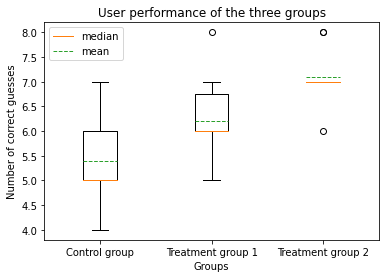

In [27]:
up_boxplot = [perfcontrol, perftreat1, perftreat2]
bp = plt.boxplot(up_boxplot, meanline=True, showmeans=True)
plt.title("User performance of the three groups")
plt.xticks([1, 2, 3], ['Control group', 'Treatment group 1', 'Treatment group 2'])
plt.xlabel("Groups")
plt.ylabel("Number of correct guesses")
plt.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'], loc = "upper left")
plt.savefig('boxplot.png', facecolor='w')

In [28]:
meancontrol = np.mean(measure_performance(controlgroup, solutions, up))
stdcontrol = np.std(measure_performance(controlgroup, solutions, up))
mean1 = np.mean(measure_performance(treatment1, solutions, up))
std1 = np.std(measure_performance(treatment1, solutions, up))
mean2 = np.mean(measure_performance(treatment2, solutions, up))
std2 = np.std(measure_performance(treatment2, solutions, up))

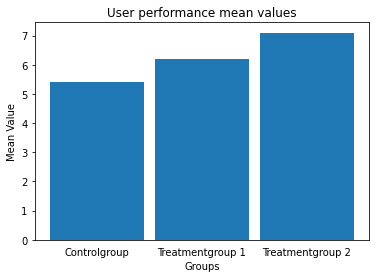

In [29]:
means = [meancontrol, mean1, mean2]
groups = ("Controlgroup", "Treatmentgroup 1", "Treatmentgroup 2")
bar_width = 0.9
plt.bar(groups, means, bar_width, align="center")
plt.xlabel("Groups")
plt.ylabel("Mean Value")
plt.title("User performance mean values")

plt.tick_params(
    axis='x',
    which='both', 
    bottom=False  
)
plt.show()

In [30]:
stats.ttest_ind(perftreat1, perfcontrol, alternative = "greater")

Ttest_indResult(statistic=1.7888543819998315, pvalue=0.045240503678035185)

In [31]:
stats.ttest_ind(perftreat2, perfcontrol, alternative = "greater")

Ttest_indResult(statistic=4.42226084457301, pvalue=0.00016443573053737456)

In [32]:
stats.ttest_ind(perftreat2, perftreat1, alternative = "greater")

Ttest_indResult(statistic=2.634930196961038, pvalue=0.008407790038821545)

In [33]:
stats.mannwhitneyu(perftreat2, perfcontrol, alternative='greater')

MannwhitneyuResult(statistic=90.0, pvalue=0.0008124853492694906)

In [34]:
stats.mannwhitneyu(perftreat2, perftreat1, alternative='greater')

MannwhitneyuResult(statistic=79.5, pvalue=0.009712158241214592)

In [35]:
#start learning outcome (lo)
perfcontrolpre = measure_performance(controlgroup, solutions, pre)
perftreat1pre = measure_performance(treatment1, solutions, pre)
perftreat2pre = measure_performance(treatment2, solutions, pre)

perfcontrolpost = measure_performance(controlgroup, solutions, post)
perftreat1post = measure_performance(treatment1, solutions, post)
perftreat2post = measure_performance(treatment2, solutions, post)

In [36]:
stat, p = levene(perfcontrolpre, perftreat1pre, perftreat2pre)
p

0.8700744551226007

In [37]:
shapiro(perfcontrolpre)

ShapiroResult(statistic=0.9318518042564392, pvalue=0.466352254152298)

In [38]:
shapiro(perftreat1pre)

ShapiroResult(statistic=0.8553237915039062, pvalue=0.06718982011079788)

In [39]:
shapiro(perftreat2pre)

ShapiroResult(statistic=0.8433137536048889, pvalue=0.04834360256791115)

In [40]:
stats.kruskal(perfcontrolpre, perftreat1pre, perftreat2pre)

KruskalResult(statistic=0.89721819061442, pvalue=0.6385156486789494)

In [41]:
perfcontrolpre

[1, 2, 1, 2, 3, 4, 1, 0, 0, 3]

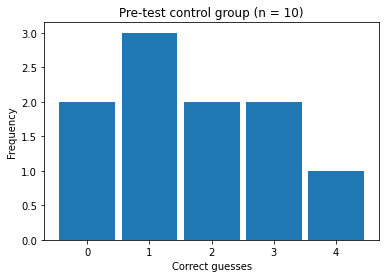

In [42]:
frequency = [2, 3, 2, 2, 1]
rightguesses = ("0","1","2","3","4")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Correct guesses")
plt.ylabel("Frequency")
plt.title("Pre-test control group (n = 10)")
plt.savefig('precontrol.png', facecolor='w')
plt.show()

In [43]:
perfcontrolpost

[1, 4, 2, 3, 4, 2, 2, 3, 3, 2]

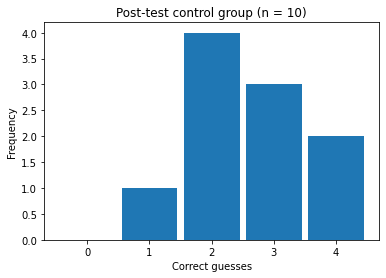

In [44]:
frequency = [0, 1, 4, 3, 2]
rightguesses = ("0","1","2","3","4")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Correct guesses")
plt.ylabel("Frequency")
plt.title("Post-test control group (n = 10)")
plt.savefig('postcontrol.png', facecolor='w')
plt.show()

In [45]:
perftreat1pre

[1, 2, 3, 3, 1, 0, 3, 1, 3, 2]

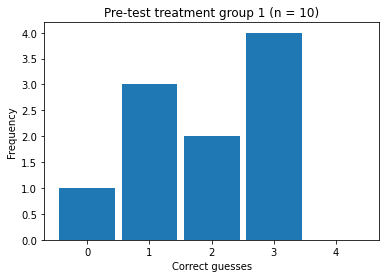

In [46]:
frequency = [1, 3, 2, 4, 0]
rightguesses = ("0","1","2","3","4")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Correct guesses")
plt.ylabel("Frequency")
plt.title("Pre-test treatment group 1 (n = 10)")
plt.savefig('pretreat1.png', facecolor='w')
plt.show()

In [47]:
perftreat1post

[1, 2, 2, 1, 3, 4, 3, 2, 1, 4]

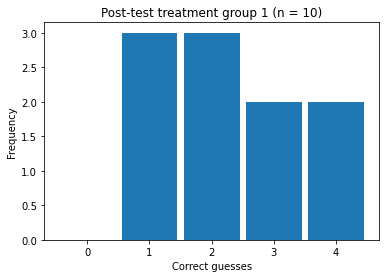

In [48]:
frequency = [0, 3, 3, 2, 2]
rightguesses = ("0","1","2","3","4")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Correct guesses")
plt.ylabel("Frequency")
plt.title("Post-test treatment group 1 (n = 10)")
plt.savefig('posttreat1.png', facecolor='w')
plt.show()

In [49]:
perftreat2pre

[3, 1, 4, 1, 3, 1, 0, 3, 3, 3]

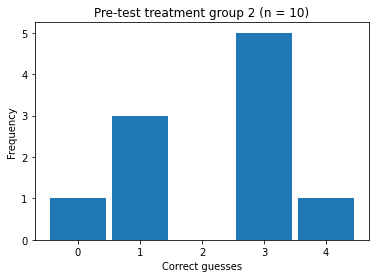

In [50]:
frequency = [1, 3, 0, 5, 1]
rightguesses = ("0","1","2","3","4")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Correct guesses")
plt.ylabel("Frequency")
plt.title("Pre-test treatment group 2 (n = 10)")
plt.savefig('pretreat2.png', facecolor='w')
plt.show()

In [51]:
perftreat2post

[2, 2, 2, 1, 2, 1, 2, 3, 2, 3]

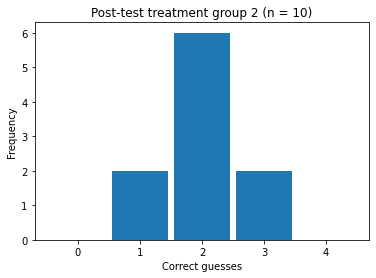

In [52]:
frequency = [0, 2, 6, 2, 0]
rightguesses = ("0","1","2","3","4")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Correct guesses")
plt.ylabel("Frequency")
plt.title("Post-test treatment group 2 (n = 10)")
plt.savefig('posttreat2.png', facecolor='w')
plt.show()

In [53]:
#ANOVA Test
f_oneway(perfcontrolpre, perftreat1pre, perftreat2pre)

F_onewayResult(statistic=0.4014084507042254, pvalue=0.6733052818140275)

In [54]:
locontrol = []
for i in range(0,10):
    lo = perfcontrolpost[i]-perfcontrolpre[i]
    locontrol.append(lo)

In [55]:
locontrol

[0, 2, 1, 1, 1, -2, 1, 3, 3, -1]

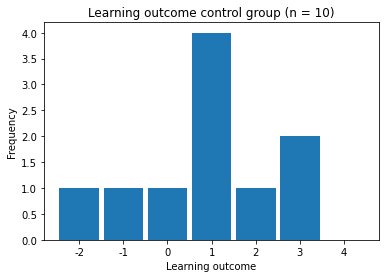

In [56]:
frequency = [1,1,1, 4, 1, 2, 0]
rightguesses = ("-2","-1","0","1","2","3","4")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Learning outcome")
plt.ylabel("Frequency")
plt.title("Learning outcome control group (n = 10)")
plt.savefig('locontrol.png', facecolor='w')
plt.show()

In [57]:
lotreat1 = []
for i in range(0,10):
    lo = perftreat1post[i]-perftreat1pre[i]
    lotreat1.append(lo)

In [58]:
lotreat1

[0, 0, -1, -2, 2, 4, 0, 1, -2, 2]

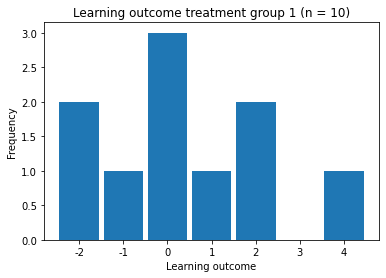

In [59]:
frequency = [2,1,3,1,2,0,1]
rightguesses = ("-2","-1","0","1","2","3","4")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Learning outcome")
plt.ylabel("Frequency")
plt.title("Learning outcome treatment group 1 (n = 10)")
plt.savefig('lotreat1.png', facecolor='w')
plt.show()

In [60]:
lotreat2 = []
for i in range(0,10):
    lo = perftreat2post[i]-perftreat2pre[i]
    lotreat2.append(lo)

In [61]:
lotreat2

[-1, 1, -2, 0, -1, 0, 2, 0, -1, 0]

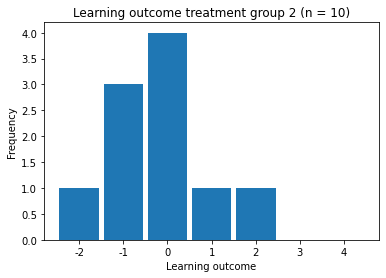

In [62]:
frequency = [1,3,4,1,1,0,0]
rightguesses = ("-2","-1","0","1","2","3","4")
bar_width = 0.9
plt.bar(rightguesses, frequency, bar_width, align="center")
plt.xlabel("Learning outcome")
plt.ylabel("Frequency")
plt.title("Learning outcome treatment group 2 (n = 10)")
plt.savefig('lotreat2.png', facecolor='w')
plt.show()

In [63]:
meanlocontrol = np.mean(locontrol)
meanlocontrol

0.9

In [64]:
meanlotreat1 = np.mean(lotreat1)
meanlotreat1

0.4

In [65]:
meanlotreat2 = np.mean(lotreat2)
meanlotreat2

-0.2

In [66]:
medianlocontrol = np.median(locontrol)
medianlocontrol

1.0

In [67]:
medianlotreat1 = np.median(lotreat1)
medianlotreat1

0.0

In [68]:
medianlotreat2 = np.median(lotreat2)
medianlotreat2

0.0

In [69]:
stdlocontrol = np.std(locontrol)*np.sqrt(10/(10-1))
stdlocontrol

1.5951314818673865

In [70]:
stdlotreat1 = np.std(lotreat1)*np.sqrt(10/(10-1))
stdlotreat1

1.897366596101028

In [71]:
stdlotreat2 = np.std(lotreat2)*np.sqrt(10/(10-1))
stdlotreat2

1.1352924243950937

In [72]:
meancontrolpre = np.mean(measure_performance(controlgroup, solutions, pre))
mean1pre = np.mean(measure_performance(treatment1, solutions, pre))
mean2pre = np.mean(measure_performance(treatment2, solutions, pre))

meancontrolpost = np.mean(measure_performance(controlgroup, solutions, post))
mean1post = np.mean(measure_performance(treatment1, solutions, post))
mean2post = np.mean(measure_performance(treatment2, solutions, post))

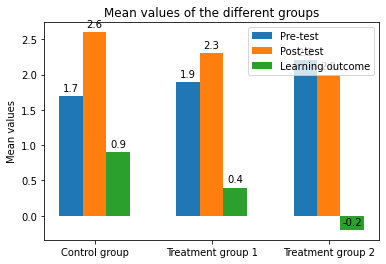

In [73]:
labels = ['Control group', 'Treatment group 1', 'Treatment group 2']
y1 = [meancontrolpre, mean1pre, mean2pre] 
y2 = [meancontrolpost, mean1post, mean2post] 
y3 = [meanlocontrol, meanlotreat1, meanlotreat2]

x = np.arange(3)
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x-0.2, y1, width, label="Pre-test")
rects11 = ax.bar(x, y2, width, label="Post-test")
rects2 = ax.bar(x+0.2, y3, width, label="Learning outcome")


ax.set_ylabel('Mean values')
ax.set_title('Mean values of the different groups')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(loc="upper right")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects11)
#plt.rcParams["figure.figsize"] = (12, 10)
#plt.savefig('meanvalueslo.png', facecolor='w')
plt.show()

In [74]:
stat, p = levene(locontrol, lotreat1, lotreat2)
p

0.4656341360502178

In [75]:
stat, p = levene(lotreat1, lotreat2)
p

0.2192866994521118

In [76]:
shapiro(locontrol)

ShapiroResult(statistic=0.9293087720870972, pvalue=0.4411277770996094)

In [77]:
shapiro(lotreat1)

ShapiroResult(statistic=0.941809892654419, pvalue=0.573322594165802)

In [78]:
shapiro(lotreat2)

ShapiroResult(statistic=0.9330770969390869, pvalue=0.4788319766521454)

In [79]:
stats.ttest_ind(lotreat1, locontrol, alternative = "greater")

Ttest_indResult(statistic=-0.6378648833438434, pvalue=0.7342034493519449)

In [80]:
stats.ttest_ind(lotreat2, locontrol, alternative = "greater")

Ttest_indResult(statistic=-1.7766602767919464, pvalue=0.9537357916803184)

In [81]:
stats.ttest_ind(lotreat2, lotreat1, alternative = "greater")

Ttest_indResult(statistic=-0.8581163303210332, pvalue=0.7989447227073263)

In [82]:
#Comparison of the pre- and post-tests
perfcontrolpre = measure_performance(controlgroup, solutions, pre)
perftreat1pre = measure_performance(treatment1, solutions, pre)
perftreat2pre = measure_performance(treatment2, solutions, pre)
perfcontrolpost = measure_performance(controlgroup, solutions, post)
perftreat1post = measure_performance(treatment1, solutions, post)
perftreat2post = measure_performance(treatment2, solutions, post)

meancontrolpre = np.mean(perfcontrolpre)
meantreat1pre = np.mean(perftreat1pre)
meantreat2pre = np.mean(perftreat2pre)
meancontrolpost = np.mean(perfcontrolpost)
meantreat1post = np.mean(perftreat1post)
meantreat2post = np.mean(perftreat2post)

stdcontrolpre = np.std(perfcontrolpre)*np.sqrt(10/(10-1))
stdtreat1pre = np.std(perftreat1pre)*np.sqrt(10/(10-1))
stdtreat2pre = np.std(perftreat2pre)*np.sqrt(10/(10-1))
stdcontrolpost = np.std(perfcontrolpost)*np.sqrt(10/(10-1))
stdtreat1post = np.std(perftreat1post)*np.sqrt(10/(10-1))
stdtreat2post = np.std(perftreat2post)*np.sqrt(10/(10-1))

In [83]:
stat, p = levene(perfcontrolpre, perfcontrolpost)
p

0.2789692225398474

In [84]:
stat, p = levene(perftreat1pre, perftreat1post)
p

1.0

In [85]:
stat, p = levene(perftreat2pre, perftreat2post)
p

0.1509504521842673

In [86]:
shapiro(perfcontrolpre)

ShapiroResult(statistic=0.9318518042564392, pvalue=0.466352254152298)

In [87]:
shapiro(perfcontrolpost)

ShapiroResult(statistic=0.9044357538223267, pvalue=0.2449132353067398)

In [88]:
stats.ttest_rel(perfcontrolpost, perfcontrolpre, alternative = "greater")

Ttest_relResult(statistic=1.7842102212287425, pvalue=0.05402762117300975)

In [89]:
shapiro(perftreat1pre)

ShapiroResult(statistic=0.8553237915039062, pvalue=0.06718982011079788)

In [90]:
shapiro(perftreat1post)

ShapiroResult(statistic=0.878067672252655, pvalue=0.12398342788219452)

In [91]:
stats.ttest_rel(perftreat1post, perftreat1pre, alternative = "greater")

Ttest_relResult(statistic=0.6666666666666666, pvalue=0.26085346354070793)

In [92]:
shapiro(perftreat2pre)

ShapiroResult(statistic=0.8433137536048889, pvalue=0.04834360256791115)

In [93]:
shapiro(perftreat2post)

ShapiroResult(statistic=0.8148398399353027, pvalue=0.021947871893644333)

In [94]:
stats.ttest_rel(perftreat2post, perftreat2pre, alternative = "greater")

Ttest_relResult(statistic=-0.5570860145311556, pvalue=0.7044743841081977)

In [95]:
res = wilcoxon(perftreat2post, perftreat2pre, alternative = "greater")
res.statistic, res.pvalue

C:\Users\denkp\anaconda3\lib\site-packages\scipy\stats\morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\denkp\anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


(8.0, 0.705655933024055)

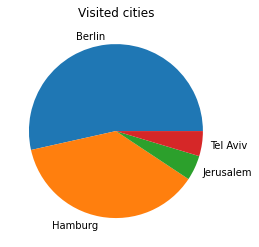

In [96]:
listberlin = df['Berlin'].tolist()
listhamburg = df['Hamburg'].tolist()
listjerusalem = df['Jerusalem'].tolist()
listtelaviv = df['TelAviv'].tolist()
countberlin = listberlin.count(1)
counthamburg = listhamburg.count(1)
countjerusalem = listjerusalem.count(1)
counttelaviv = listtelaviv.count(1)

cities = ["Berlin", "Hamburg", "Jerusalem", "Tel Aviv"]
numbers = [countberlin, counthamburg, countjerusalem, counttelaviv]
plt.title("Visited cities", fontsize = 12)

plt.pie(numbers, labels = cities)
plt.savefig('visited_cities.png', facecolor='w')
plt.show()

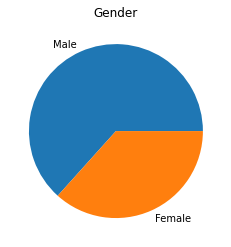

In [97]:
listgender = df["Gender"].tolist()
countgendermale = listgender.count("M")
countgenderfemale = listgender.count("W")

gender = ["Male", "Female"]
numbers = [countgendermale, countgenderfemale]
plt.title("Gender", fontsize = 12)

plt.pie(numbers, labels = gender)
plt.savefig('gender.png', facecolor='w')
plt.show()

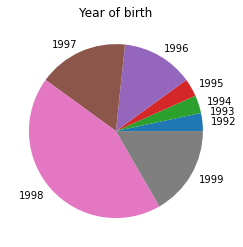

In [98]:
listbirth = df["Yearofbirth"].tolist()
count92 = listbirth.count(1992) 
count93 = listbirth.count(1993)
count94 = listbirth.count(1994)
count95 = listbirth.count(1995)
count96 = listbirth.count(1996)
count97 = listbirth.count(1997)
count98 = listbirth.count(1998)
count99 = listbirth.count(1999)

birth =["1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999"]
numbers = [count92, count93, count94, count95, count96, count97, count98, count99]
plt.title("Year of birth", fontsize = 12)

plt.pie(numbers, labels = birth)
plt.savefig('birth.png', facecolor='w')
plt.show()

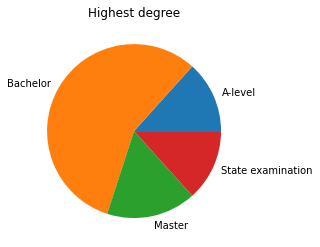

In [99]:
listdegree = df["highest_degree"].tolist()
countA_level = listdegree.count("A_level")
countbachelor = listdegree.count("Bachelor")
countmaster = listdegree.count("Master")
countstate_exam = listdegree.count("State_exam")

degree =["A-level", "Bachelor", "Master", "State examination"]
numbers = [countA_level, countbachelor, countmaster, countstate_exam]
plt.title("Highest degree", fontsize = 12)

plt.pie(numbers, labels = degree)
plt.savefig('degree.png', facecolor='w')
plt.show()

In [100]:
listcontrol=controlgroup[["P5","P6","P7","P8","P9","P10","P11","P12"]]
listcontrol

,P5,P6,P7,P8,P9,P10,P11,P12
2,B,H,J,T,B,H,B,J
3,B,H,J,J,B,B,T,B
4,B,H,T,T,B,B,B,H
5,H,H,T,T,B,H,B,B
6,J,H,J,J,B,H,B,H
7,B,H,T,J,H,B,B,T
8,B,H,T,J,B,H,B,B
9,B,H,T,J,H,H,B,H
10,B,H,J,T,H,H,B,J
11,B,H,T,J,B,H,B,H


In [101]:
newlistcontrol = listcontrol.values.tolist()

In [102]:
control = []
for i in newlistcontrol:
    for j in i:
        control.append(j)

In [103]:
listsolution = df.head(1)[["P5","P6","P7","P8","P9","P10","P11","P12"]]
listsolution

,P5,P6,P7,P8,P9,P10,P11,P12
0,B,H,T,J,B,H,B,T


In [104]:
newlistsolution = listsolution.values.tolist()

In [105]:
newlistsolution2 = newlistsolution*10

In [106]:
solution = []
for i in newlistsolution2:
    for j in i:
        solution.append(j)

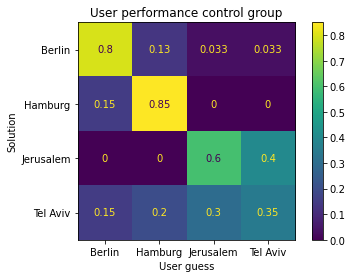

In [107]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = solution
predicted = control

confusion_matrix = metrics.confusion_matrix(actual, predicted)

a = confusion_matrix[0]*(1/30)
b = confusion_matrix[1]*(1/20)
c = confusion_matrix[2]*(1/10)
d = confusion_matrix[3]*(1/20)
matrix=np.concatenate((a, b, c, d))

matrix=matrix.reshape(4,4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["Berlin", "Hamburg", "Jerusalem", "Tel Aviv"])

cm_display.plot()
plt.xlabel('User guess')
plt.ylabel('Solution')
plt.title("User performance control group")
#plt.savefig('confusioncontrol.png', facecolor='w')
plt.show()

In [108]:
listtreat1=treatment1[["P5","P6","P7","P8","P9","P10","P11","P12"]]
listtreat1

,P5,P6,P7,P8,P9,P10,P11,P12
12,B,H,T,J,B,H,B,H
13,B,J,T,J,H,B,B,T
14,B,H,T,J,B,B,B,T
15,H,H,T,T,B,H,B,T
16,B,H,T,J,H,H,B,B
17,B,H,J,J,B,B,B,T
18,H,H,T,T,B,H,B,H
19,B,H,T,J,H,B,B,T
20,B,H,J,J,B,H,B,H
21,B,H,T,J,B,H,B,T


In [109]:
newlisttreat1 = listtreat1.values.tolist()

In [110]:
treat1 = []
for i in newlisttreat1:
    for j in i:
        treat1.append(j)

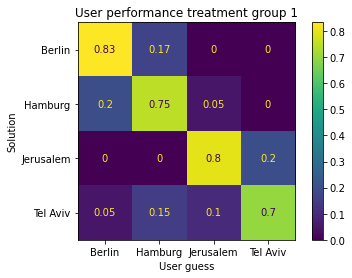

In [111]:
actual = solution
predicted = treat1

confusion_matrix = metrics.confusion_matrix(actual, predicted)

a = confusion_matrix[0]*(1/30)
b = confusion_matrix[1]*(1/20)
c = confusion_matrix[2]*(1/10)
d = confusion_matrix[3]*(1/20)
matrix=np.concatenate((a, b, c, d))

matrix=matrix.reshape(4,4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["Berlin", "Hamburg", "Jerusalem", "Tel Aviv"])

cm_display.plot()
plt.xlabel('User guess')
plt.ylabel('Solution')
plt.title("User performance treatment group 1")
#plt.savefig('confusiontreat1.png', facecolor='w')
plt.show()

In [112]:
listtreat2=treatment2[["P5","P6","P7","P8","P9","P10","P11","P12"]]
listtreat2

,P5,P6,P7,P8,P9,P10,P11,P12
22,B,H,T,J,B,H,B,B
23,B,H,T,J,H,H,B,T
24,B,H,T,J,H,H,B,T
25,B,H,T,T,B,H,B,T
26,B,H,T,J,B,H,B,T
27,B,H,T,J,H,H,B,T
28,B,H,T,J,H,H,B,T
29,B,H,T,J,B,H,B,T
30,B,H,T,T,H,H,B,T
31,B,H,T,J,H,H,B,T


In [113]:
newlisttreat2 = listtreat2.values.tolist()

In [114]:
treat2 = []
for i in newlisttreat2:
    for j in i:
        treat2.append(j)

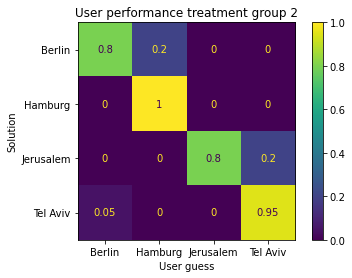

In [115]:
actual = solution
predicted = treat2

confusion_matrix = metrics.confusion_matrix(actual, predicted)

a = confusion_matrix[0]*(1/30)
b = confusion_matrix[1]*(1/20)
c = confusion_matrix[2]*(1/10)
d = confusion_matrix[3]*(1/20)
matrix=np.concatenate((a, b, c, d))

matrix=matrix.reshape(4,4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["Berlin", "Hamburg", "Jerusalem", "Tel Aviv"])

cm_display.plot()
plt.xlabel('User guess')
plt.ylabel('Solution')
plt.title("User performance treatment group 2")
#plt.savefig('confusiontreat2.png', facecolor='w')
plt.show()

In [116]:
listai = df.iloc[[1]][["P5","P6","P7","P8","P9","P10","P11","P12"]]
listai

,P5,P6,P7,P8,P9,P10,P11,P12
1,B,H,T,J,H,H,B,T


In [117]:
newlistai = listai.values.tolist()
newlistai

[['B', 'H', 'T', 'J', 'H', 'H', 'B', 'T']]

In [118]:
solutionai = []
for i in newlistsolution:
    for j in i:
        solutionai.append(j)

In [119]:
aiguess = []
for i in newlistai:
    for j in i:
        aiguess.append(j)
aiguess

['B', 'H', 'T', 'J', 'H', 'H', 'B', 'T']

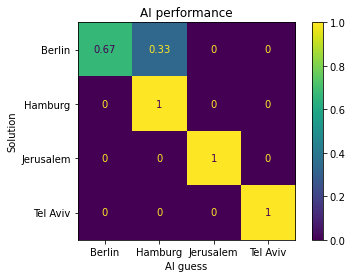

In [120]:
actual = solutionai
predicted = aiguess

confusion_matrix = metrics.confusion_matrix(actual, predicted)

a = confusion_matrix[0]*(1/3)
b = confusion_matrix[1]*(1/2)
c = confusion_matrix[2]*(1/1)
d = confusion_matrix[3]*(1/2)
matrix=np.concatenate((a, b, c, d))

matrix=matrix.reshape(4,4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ["Berlin", "Hamburg", "Jerusalem", "Tel Aviv"])

cm_display.plot()
plt.xlabel('AI guess')
plt.ylabel('Solution')
plt.title("AI performance")
#plt.savefig('confusionai.png', facecolor='w')
plt.show()